<a href="https://colab.research.google.com/github/Mezo-555/AI_Platforms_Assignments/blob/main/Ai_Platforms_Ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion-MNIST Classification (MLP)**

In [50]:
# Libraries imported
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

## Data Loading & Preprocessing

In [51]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download datasets
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

# Data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Class labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Define Neural Network Model

In [52]:
class FashionMNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)   # Flatten
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss, and optimizer
model = FashionMNIST_MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training the Model

In [53]:
epochs = 10
train_losses, train_accuracies = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Compute training accuracy on the fly
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.2f}%")

Epoch [1/10], Training Loss: 0.4924, Training Accuracy: 81.78%
Epoch [2/10], Training Loss: 0.3654, Training Accuracy: 86.49%
Epoch [3/10], Training Loss: 0.3312, Training Accuracy: 87.71%
Epoch [4/10], Training Loss: 0.3049, Training Accuracy: 88.67%
Epoch [5/10], Training Loss: 0.2870, Training Accuracy: 89.28%
Epoch [6/10], Training Loss: 0.2706, Training Accuracy: 89.91%
Epoch [7/10], Training Loss: 0.2568, Training Accuracy: 90.34%
Epoch [8/10], Training Loss: 0.2446, Training Accuracy: 90.87%
Epoch [9/10], Training Loss: 0.2330, Training Accuracy: 91.33%
Epoch [10/10], Training Loss: 0.2201, Training Accuracy: 91.62%


## Final Evaluation

In [54]:
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Compute final accuracy
final_accuracy = 100 * np.mean(np.array(y_true) == np.array(y_pred))
print(f"\n✅ Final Test Accuracy: {final_accuracy:.2f}%")


✅ Final Test Accuracy: 88.50%


## Confusion Matrix

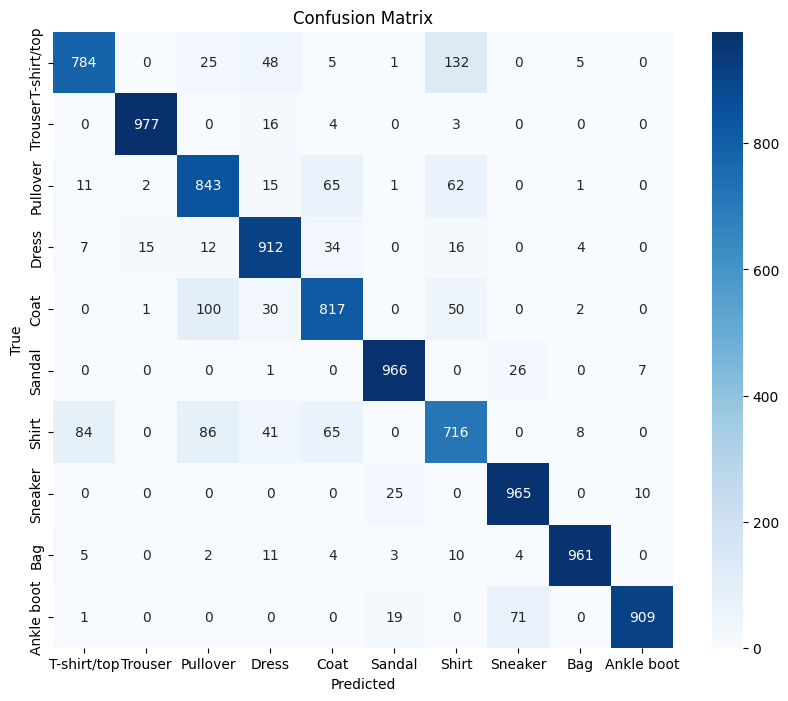

In [55]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Visualize Sample Predictions

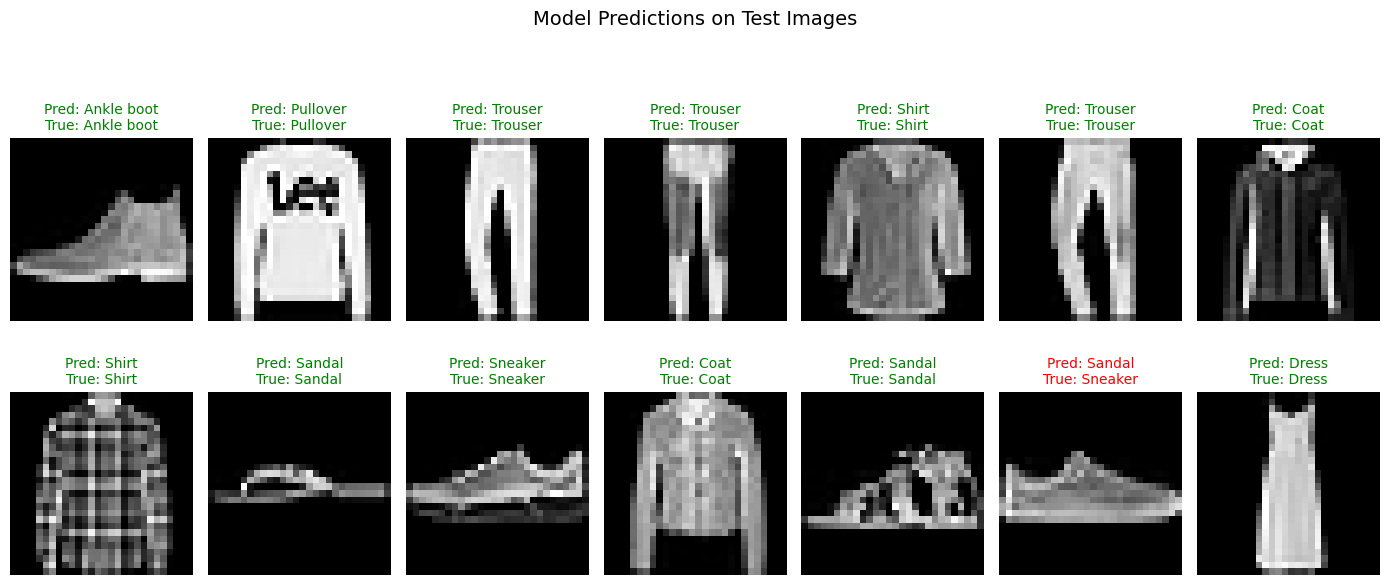

In [62]:
model.eval()
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Get predictions
outputs = model(images)
_, preds = torch.max(outputs, 1)

# Number of images to display
n_images = 14

# Create figure
plt.figure(figsize=(14, 6))
for i in range(n_images):
    plt.subplot(2, n_images // 2, i + 1)

    # Undo normalization: from [-1,1] → [0,1]
    img = images[i] * 0.5 + 0.5
    img = img.squeeze()  # remove channel dimension (1,28,28 → 28x28)

    # Plot grayscale image
    plt.imshow(img, cmap='gray')

    # Title shows prediction and true label
    color = 'green' if preds[i] == labels[i] else 'red'
    plt.title(f"Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}",
              color=color, fontsize=10)
    plt.axis('off')

plt.suptitle("Model Predictions on Test Images", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

## Plot Training Progress

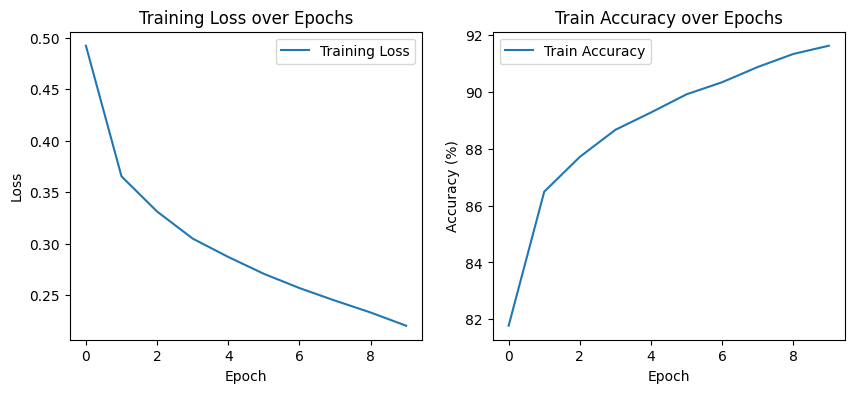

In [58]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train Accuracy over Epochs')
plt.legend()
plt.show()

## Conclusion

The fully connected neural network achieved a final test accuracy of 88.5%, surpassing the target benchmark of 85%. The training loss consistently decreased across epochs, indicating effective learning and stable convergence. From the confusion matrix, the model performed particularly well on classes like Sneaker, Bag, and Trouser, while showing some confusion between visually similar categories such as Shirt, T-shirt/top, and Coat. Overall, the model demonstrates strong classification performance on the Fashion-MNIST dataset, effectively distinguishing most clothing types using a simple multilayer perceptron architecture.